San Francisco Points Mean  23.785714285714285
San Francisco Points SD  7.318875191307341
Arizona Points Mean  27.928571428571427
Arizona Points SD  6.219872441361896
San Francisco OppPoints Mean  25.142857142857142
San Francisco OppPoints SD  9.982677303902303
Arizona OppPoints Mean  23.5
Arizona OppPoints SD  9.982677303902303
SF Win  0.3451 %
ARI Win  0.6099 %
Tie  0.045 %


/Users/dannydibeneditto/NFLSimulator/lib/python3.9/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


[-1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 1,
 1,
 0,
 1,
 1,
 -1,
 1,
 0,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 -1,
 1,
 0,
 -1,
 0,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 0,
 1,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 0,
 -

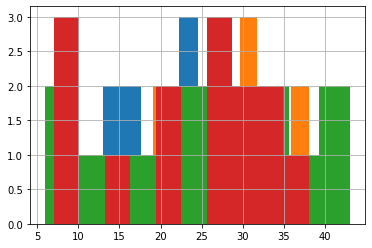

In [3]:
import pandas as pd
import random as rnd


gdf = pd.read_csv('2020_NFL.csv')


gdf.columns


favdf = gdf[gdf.Team == 'San Francisco 49ers']
unddf = gdf[gdf.Team == 'Arizona Cardinals']


favdf.Date = favdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
unddf.Date = unddf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))


favdf.TeamPoints.hist()
unddf.TeamPoints.hist()


favdf.OpponentPoints.hist()
unddf.OpponentPoints.hist()


favmeanpts = favdf.TeamPoints.mean()
undmeanpts = unddf.TeamPoints.mean()
favsdpts = favdf.TeamPoints.std()
undsdpts = unddf.TeamPoints.std()

favmeanopp = favdf.OpponentPoints.mean()
undmeanopp = unddf.OpponentPoints.mean()
favsdopp = unddf.OpponentPoints.std()
undsdopp = unddf.OpponentPoints.std()

print("San Francisco Points Mean ", favmeanpts)
print("San Francisco Points SD ", favsdpts)
print("Arizona Points Mean ", undmeanpts)
print("Arizona Points SD ", undsdpts)

print("San Francisco OppPoints Mean ", favmeanopp)
print("San Francisco OppPoints SD ", favsdopp)
print("Arizona OppPoints Mean ", undmeanopp)
print("Arizona OppPoints SD ", undsdopp)


def gameSim():
    SFScore = (rnd.gauss(favmeanpts,favsdpts)+ rnd.gauss(undmeanopp,undsdopp))/2
    ARIScore = (rnd.gauss(undmeanpts,undsdpts)+ rnd.gauss(favmeanopp,favsdopp))/2
    if int(round(SFScore)) > int(round(ARIScore)):
        return 1
    elif int(round(SFScore)) < int(round(ARIScore)):
        return -1
    else: return 0

def gamesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1
        elif gm == -1:
            team2win +=1
        else: tie +=1
    print('SF Win ', team1win/(team1win+team2win+tie),'%')
    print('ARI Win ', team2win/(team1win+team2win+tie),'%')
    print('Tie ', tie/(team1win+team2win+tie), '%')
    return gamesout

gamesSim(10000)

